# CASE 1: QWP in, sub_tint = 0, noise_percentage = 0.1

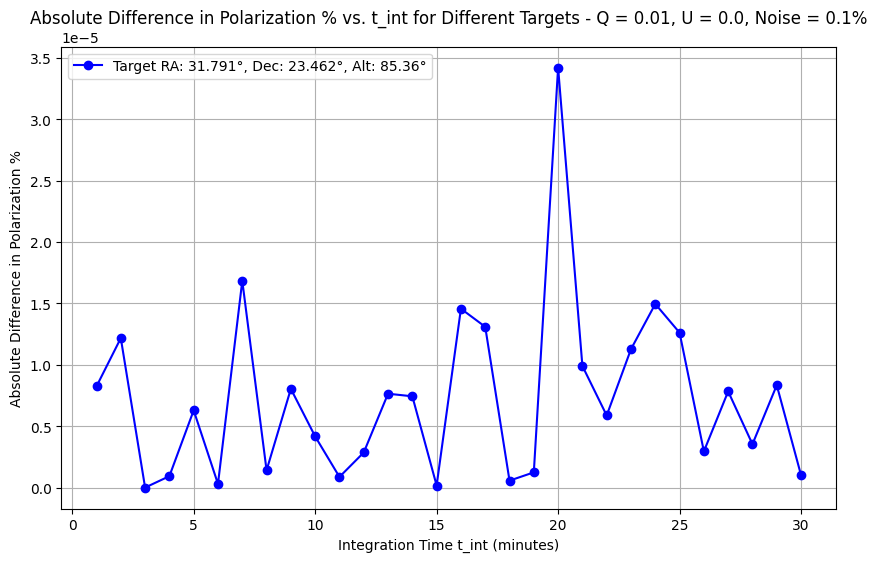

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../python/')
import angles
import instrument_mm
import stokes

# NOTE: Noise properties for both measurements
noise_percentage = 0  # Intensity noise

# Define observer parameters
observer_latitude = 20.0  # Latitude of Mauna Kea in degrees
observer_longitude = -155.5  # Longitude of Mauna Kea in degrees

# Define target parameters
targets = [
    {"ra": 31.791, "dec": 23.462},  # Hamal (Alpha Arietis)
    # {"ra": 51.079, "dec": 49.861},  # Mirfak (Alpha Persei)
    # {"ra": 37.954, "dec": 89.264},  # Polaris (Alpha Ursae Minoris)
]

# Observation date and time
observation_date = "2460614.91667"  # JD for 10/31/2024
observation_time = "10:00:00"   # UT time to get peak at midnight HST

# Fixed integration time and sub-integration time
t_int = 1 * 60  # 1 minute in seconds
sub_tint = 1  # 1 second
num_samples = 100

# Time intervals in seconds (1 to 10 minutes in 1-minute increments)
sub_tint = None # given in seconds
time_intervals = np.arange(1, 31) * 60  # Convert minutes to seconds
Q_injected = 0.01 # Example injected polarization level in Stokes Q
U_injected = 0.0
V_injected = 0
noise_percentage = 0.1
matrix_noise = 5
matrix_noise_type = "additive"

# HWP properties
HWP_angs = np.array([0, 45, 90, 135])
delta_HWP = 0.25 # QWP instead of HWP
# HWP_angs = np.array([0, 22.5, 45, 67.5])
# delta_HWP = 0.5 # QWP instead of HWP

include_V = True


# Colors for each target
colors = ['blue', 'green', 'orange']

# Plot data storage
polarization_differences = {i: [] for i in range(len(targets))}

# Run the simulation for each target and each time interval
for target_idx, target in enumerate(targets):
    injected_polarization = np.sqrt(Q_injected**2 + U_injected**2)
    
    for t_int in time_intervals:
        # Run matrix inversion function with dynamic PA and altitude, using sub_tint = 1 second
        S_in_retrieved = instrument_mm.calculate_input_Q_U_observing_sequence_matrix_inversion(
            ra=target["ra"], 
            dec=target["dec"], 
            observer_latitude=observer_latitude, 
            observer_longitude=observer_longitude, 
            jd_str=observation_date, 
            ut_start=observation_time, 
            t_int=t_int, 
            Q=Q_injected, 
            U=U_injected, 
            V=V_injected,
            delta_HWP=delta_HWP,
            noise_percentage=noise_percentage,
            include_V=include_V,
            HWP_angs = HWP_angs,
            matrix_noise = matrix_noise,
            matrix_noise_type = matrix_noise_type,
            sub_tint=sub_tint  # Sub-integration time in seconds
        )
        
        # Calculate retrieved polarization
        Q_retrieved, U_retrieved = S_in_retrieved[1], S_in_retrieved[2]
        retrieved_polarization = np.sqrt(Q_retrieved**2 + U_retrieved**2)
        
        # Absolute difference in polarization percentage
        abs_diff_polarization = np.abs(injected_polarization - retrieved_polarization)
        polarization_differences[target_idx].append(abs_diff_polarization)

# Plotting the results
plt.figure(figsize=(10, 6))
for target_idx, target in enumerate(targets):
    altitude = angles.calculate_altitude(
        phi=observer_latitude, 
        delta=target["dec"], 
        H=angles.calculate_hour_angle(
            ra=target["ra"], 
            observer_longitude=observer_longitude, 
            ut=observation_time, 
            jd_str=observation_date
        )
    )
    plt.plot(time_intervals / 60, polarization_differences[target_idx], '-o', color=colors[target_idx],
             label=f'Target RA: {target["ra"]}°, Dec: {target["dec"]}°, Alt: {altitude:.2f}°')

# Plot settings
plt.xlabel('Integration Time t_int (minutes)')
plt.ylabel('Absolute Difference in Polarization %')
plt.title("Absolute Difference in Polarization % vs. t_int for Different Targets - Q = " \
    + str(Q_injected) + ", U = " + str(U_injected) + ", Noise = " + \
    str(noise_percentage) + str("%"))
plt.legend()
plt.grid(True)
plt.show()

# CASE 2: HWP instead

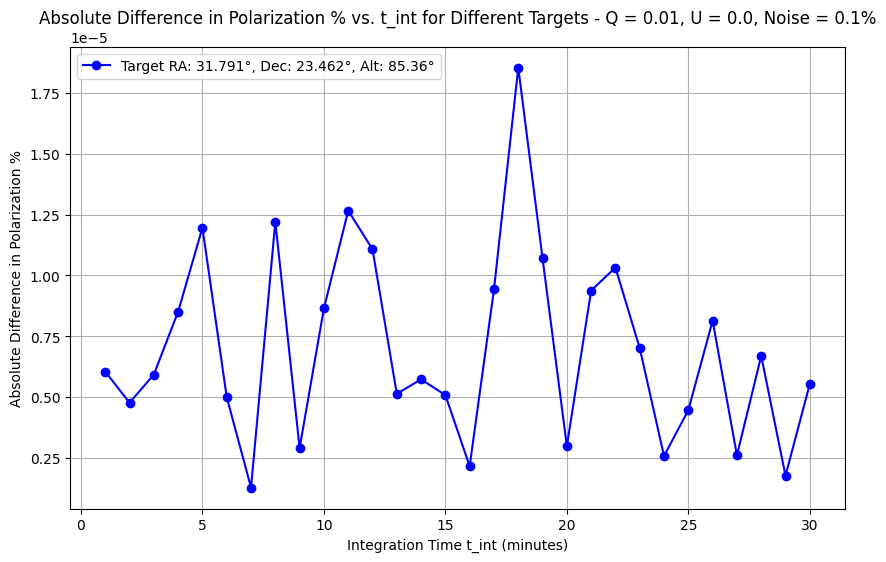

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../python/')
import angles
import instrument_mm
import stokes

# Define observer parameters
observer_latitude = 20.0  # Latitude of Mauna Kea in degrees
observer_longitude = -155.5  # Longitude of Mauna Kea in degrees

# Define target parameters
targets = [
    {"ra": 31.791, "dec": 23.462},  # Hamal (Alpha Arietis)
    # {"ra": 51.079, "dec": 49.861},  # Mirfak (Alpha Persei)
    # {"ra": 37.954, "dec": 89.264},  # Polaris (Alpha Ursae Minoris)
]

# Observation date and time
observation_date = "2460614.91667"  # JD for 10/31/2024
observation_time = "10:00:00"   # UT time to get peak at midnight HST

# Fixed integration time and sub-integration time
t_int = 1 * 60  # 1 minute in seconds
sub_tint = 1  # 1 second
num_samples = 100

# Time intervals in seconds (1 to 10 minutes in 1-minute increments)
sub_tint = None # given in seconds
time_intervals = np.arange(1, 31) * 60  # Convert minutes to seconds
# Q_injected = 0.01 # Example injected polarization level in Stokes Q
# U_injected = 0
# V_injected = 0
# noise_percentage = 0

# HWP properties
# HWP_angs = np.array([0, 45, 90, 135])
# delta_HWP = 0.25 # QWP instead of HWP
HWP_angs = np.array([0, 22.5, 45, 67.5])
delta_HWP = 0.5 # QWP instead of HWP

include_V = False

# Colors for each target
colors = ['blue', 'green', 'orange']

# Plot data storage
polarization_differences = {i: [] for i in range(len(targets))}

# Run the simulation for each target and each time interval
for target_idx, target in enumerate(targets):
    injected_polarization = np.sqrt(Q_injected**2 + U_injected**2)
    
    for t_int in time_intervals:
        # Run matrix inversion function with dynamic PA and altitude, using sub_tint = 1 second
        S_in_retrieved = instrument_mm.calculate_input_Q_U_observing_sequence_matrix_inversion(
            ra=target["ra"], 
            dec=target["dec"], 
            observer_latitude=observer_latitude, 
            observer_longitude=observer_longitude, 
            jd_str=observation_date, 
            ut_start=observation_time, 
            t_int=t_int, 
            Q=Q_injected, 
            U=U_injected, 
            V=V_injected,
            delta_HWP=delta_HWP,
            noise_percentage=noise_percentage,
            include_V=include_V,
            HWP_angs = HWP_angs,
            matrix_noise = matrix_noise,
            matrix_noise_type = matrix_noise_type,
            sub_tint=sub_tint  # Sub-integration time in seconds
        )
        
        # Calculate retrieved polarization
        Q_retrieved, U_retrieved = S_in_retrieved[1], S_in_retrieved[2]
        retrieved_polarization = np.sqrt(Q_retrieved**2 + U_retrieved**2)
        
        # Absolute difference in polarization percentage
        abs_diff_polarization = np.abs(injected_polarization - retrieved_polarization)
        polarization_differences[target_idx].append(abs_diff_polarization)

# Plotting the results
plt.figure(figsize=(10, 6))
for target_idx, target in enumerate(targets):
    altitude = angles.calculate_altitude(
        phi=observer_latitude, 
        delta=target["dec"], 
        H=angles.calculate_hour_angle(
            ra=target["ra"], 
            observer_longitude=observer_longitude, 
            ut=observation_time, 
            jd_str=observation_date
        )
    )
    plt.plot(time_intervals / 60, polarization_differences[target_idx], '-o', color=colors[target_idx],
             label=f'Target RA: {target["ra"]}°, Dec: {target["dec"]}°, Alt: {altitude:.2f}°')

# Plot settings
plt.xlabel('Integration Time t_int (minutes)')
plt.ylabel('Absolute Difference in Polarization %')
plt.title("Absolute Difference in Polarization % vs. t_int for Different Targets - Q = " \
    + str(Q_injected) + ", U = " + str(U_injected) + ", Noise = " + \
    str(noise_percentage) + str("%"))
plt.legend()
plt.grid(True)
plt.show()